# Notebook Nettoyage/ Exploration

## Importer les librairies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import datetime
import missingno as msno
import matplotlib.image as img

# Shema du Dataset

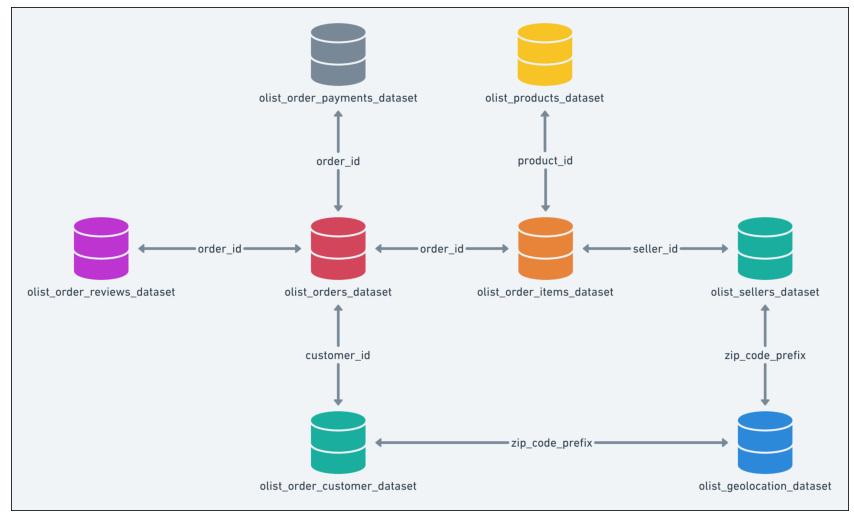

In [2]:
image = img.imread('https://i.imgur.com/HRhd2Y0.png')
plt.figure(figsize=(15, 10))
plt.xticks([])
plt.yticks([])
plt.imshow(image)
plt.show()

## Chargement du dataset

### data_customers

In [3]:
data_customers=pd.read_csv("olist_customers_dataset.csv",encoding="utf-8")
data_customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [4]:
# Nombre des NaN dans chaque colonne
data_customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [5]:
n = data_customers.nunique(axis=0)
  
print("No.of.unique values in each column :\n", n)

No.of.unique values in each column :
 customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64


###  data_geolocation

In [6]:
data_geolocation=pd.read_csv("olist_geolocation_dataset.csv",encoding="utf-8")
data_geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [7]:
# Nombre des NaN dans chaque colonne
data_geolocation.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [8]:
n = data_geolocation.nunique(axis=0)
  
print("No.of.unique values in each column :\n", n)

No.of.unique values in each column :
 geolocation_zip_code_prefix     19015
geolocation_lat                717358
geolocation_lng                717613
geolocation_city                 8011
geolocation_state                  27
dtype: int64


### data_order_items

In [9]:
data_order_items=pd.read_csv("olist_order_items_dataset.csv",encoding="utf-8")
data_order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [10]:
# Nombre des NaN dans chaque colonne
data_order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [11]:
n = data_order_items.nunique(axis=0)
  
print("No.of.unique values in each column :\n", n)

No.of.unique values in each column :
 order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64


In [12]:
data_order_items['order_item_id'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21], dtype=int64)

### data_order_payments

In [13]:
data_order_payments=pd.read_csv("olist_order_payments_dataset.csv",encoding="utf-8")
data_order_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [14]:
# Nombre des NaN dans chaque colonne
data_order_payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [15]:
n = data_order_payments.nunique(axis=0)
  
print("No.of.unique values in each column :\n", n)

No.of.unique values in each column :
 order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64


### data_order_reviews

In [16]:
data_order_reviews=pd.read_csv("olist_order_reviews_dataset.csv",encoding="utf-8")
data_order_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99995,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99997,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,NaN,Solicitei a compra de uma capa de retrovisor c...,2017-12-15 00:00:00,2017-12-16 01:29:43


In [17]:
# Nombre des NaN dans chaque colonne
data_order_reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [18]:
n = data_order_reviews.nunique(axis=0)
  
print("No.of.unique values in each column :\n", n)

No.of.unique values in each column :
 review_id                  99173
order_id                   99441
review_score                   5
review_comment_title        4600
review_comment_message     36921
review_creation_date         637
review_answer_timestamp    99010
dtype: int64


### data_orders

In [19]:
data_orders=pd.read_csv("olist_orders_dataset.csv",encoding="utf-8")
data_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [20]:
# Nombre des NaN dans chaque colonne
data_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [21]:
n = data_orders.nunique(axis=0)
  
print("No.of.unique values in each column :\n", n)

No.of.unique values in each column :
 order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64


In [22]:
data_orders['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

### data_products

In [23]:
data_products=pd.read_csv("olist_products_dataset.csv",encoding="utf-8")
data_products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [24]:
# Nombre des NaN dans chaque colonne
data_products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [25]:
n = data_products.nunique(axis=0)
  
print("No.of.unique values in each column :\n", n)

No.of.unique values in each column :
 product_id                    32951
product_category_name            73
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64


### data_sellers

In [26]:
data_sellers=pd.read_csv("olist_sellers_dataset.csv",encoding="utf-8")
data_sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [27]:
# Nombre des NaN dans chaque colonne
data_sellers.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [28]:
n = data_sellers.nunique(axis=0)
  
print("No.of.unique values in each column :\n", n)

No.of.unique values in each column :
 seller_id                 3095
seller_zip_code_prefix    2246
seller_city                611
seller_state                23
dtype: int64


# Feature engineering

In [29]:
data = pd.merge(data_customers, data_orders, how='left', on='customer_id' )


In [30]:
data = pd.merge(data, data_order_reviews, how='left', on='order_id' )

In [31]:
data = pd.merge(data, data_order_payments, how='left', on='order_id' )

In [32]:
data = pd.merge(data, data_order_items, how='left', on='order_id' )

In [33]:
data

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,credit_card,2.0,146.87,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,1.0,credit_card,8.0,335.48,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1.0,credit_card,7.0,157.73,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1.0,credit_card,1.0,173.30,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1.0,credit_card,8.0,252.25,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119146,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,...,1.0,credit_card,6.0,88.78,1.0,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88
119147,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,...,1.0,credit_card,3.0,129.06,1.0,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,14.16
119148,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,...,1.0,credit_card,5.0,56.04,1.0,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:03,37.00,19.04
119149,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,...,1.0,credit_card,2.0,711.07,1.0,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,2017-11-09 21:15:51,689.00,22.07


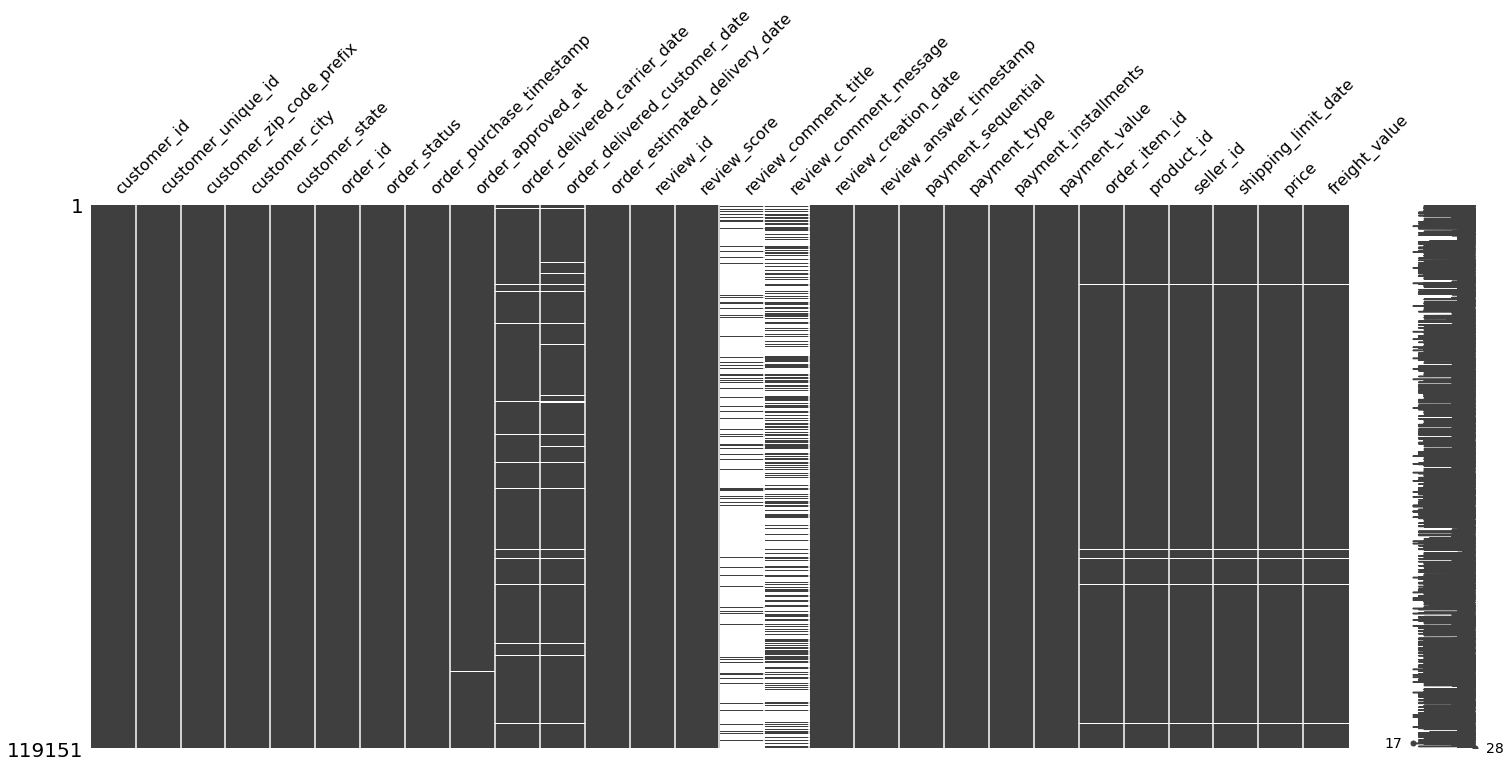

In [34]:
msno.matrix(data);

In [35]:
data2=data[['customer_id', 'customer_unique_id','order_id','order_item_id','order_status','order_purchase_timestamp',
            'order_delivered_customer_date','review_score','payment_sequential','payment_installments',
            'payment_value','price', 'freight_value']]

In [36]:
data2

,customer_id,customer_unique_id,order_id,order_item_id,order_status,order_purchase_timestamp,order_delivered_customer_date,review_score,payment_sequential,payment_installments,payment_value,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,1.0,delivered,2017-05-16 15:05:35,2017-05-25 10:35:35,4,1.0,2.0,146.87,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,1.0,delivered,2018-01-12 20:48:24,2018-01-29 12:41:19,5,1.0,8.0,335.48,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,1.0,delivered,2018-05-19 16:07:45,2018-06-14 17:58:51,5,1.0,7.0,157.73,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,1.0,delivered,2018-03-13 16:06:38,2018-03-28 16:04:25,5,1.0,1.0,173.30,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,1.0,delivered,2018-07-29 09:51:30,2018-08-09 20:55:48,5,1.0,8.0,252.25,230.00,22.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119146,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,6760e20addcf0121e9d58f2f1ff14298,1.0,delivered,2018-04-07 15:48:17,2018-04-13 20:06:37,4,1.0,6.0,88.78,74.90,13.88
119147,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,9ec0c8947d973db4f4e8dcf1fbfa8f1b,1.0,delivered,2018-04-04 08:20:22,2018-04-11 18:54:45,5,1.0,3.0,129.06,114.90,14.16
119148,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,fed4434add09a6f332ea398efd656a5c,1.0,delivered,2018-04-08 20:11:50,2018-05-09 19:03:15,1,1.0,5.0,56.04,37.00,19.04
119149,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,e31ec91cea1ecf97797787471f98a8c2,1.0,delivered,2017-11-03 21:08:33,2017-11-16 19:58:39,5,1.0,2.0,711.07,689.00,22.07


In [37]:
# Supprimer les doublons
data2.duplicated().sum()

422

In [38]:
data2=data2.drop_duplicates()

In [39]:
data2.duplicated().sum()

0

In [40]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118729 entries, 0 to 119150
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    118729 non-null  object 
 1   customer_unique_id             118729 non-null  object 
 2   order_id                       118729 non-null  object 
 3   order_item_id                  117898 non-null  float64
 4   order_status                   118729 non-null  object 
 5   order_purchase_timestamp       118729 non-null  object 
 6   order_delivered_customer_date  115318 non-null  object 
 7   review_score                   118729 non-null  int64  
 8   payment_sequential             118726 non-null  float64
 9   payment_installments           118726 non-null  float64
 10  payment_value                  118726 non-null  float64
 11  price                          117898 non-null  float64
 12  freight_value                 

### Conversion datetime

In [41]:
# transform 'order_purchase_timestamp' -> datetime64[ns]
data2['order_purchase_timestamp'] = pd.to_datetime(data2.order_purchase_timestamp)

<ipython-input-41-086e425dc381>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['order_purchase_timestamp'] = pd.to_datetime(data2.order_purchase_timestamp)


In [42]:
# transform 'order_purchase_timestamp' -> datetime64[ns]
data2['order_delivered_customer_date'] = pd.to_datetime(data2.order_delivered_customer_date)

<ipython-input-42-1e401c8a40eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['order_delivered_customer_date'] = pd.to_datetime(data2.order_delivered_customer_date)


In [43]:
data2.describe()

,order_item_id,review_score,payment_sequential,payment_installments,payment_value,price,freight_value
count,117898.000000,118729.000000,118726.000000,118726.000000,118726.000000,117898.000000,117898.000000
mean,1.196314,3.997650,1.094377,2.939381,172.829612,120.746458,20.041249
std,0.698057,1.412588,0.728342,2.776514,268.035527,184.302843,15.849904
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.850000,0.000000
25%,1.000000,3.000000,1.000000,1.000000,60.860000,39.900000,13.080000
50%,1.000000,5.000000,1.000000,2.000000,108.200000,74.900000,16.290000
75%,1.000000,5.000000,1.000000,4.000000,189.300000,134.900000,21.190000
max,21.000000,5.000000,29.000000,24.000000,13664.080000,6735.000000,409.680000


In [44]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118729 entries, 0 to 119150
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    118729 non-null  object        
 1   customer_unique_id             118729 non-null  object        
 2   order_id                       118729 non-null  object        
 3   order_item_id                  117898 non-null  float64       
 4   order_status                   118729 non-null  object        
 5   order_purchase_timestamp       118729 non-null  datetime64[ns]
 6   order_delivered_customer_date  115318 non-null  datetime64[ns]
 7   review_score                   118729 non-null  int64         
 8   payment_sequential             118726 non-null  float64       
 9   payment_installments           118726 non-null  float64       
 10  payment_value                  118726 non-null  float64       
 11  

In [45]:
data2.shape

(118729, 13)

### selectionner uniquement les commandes dont le order_status ="delivered"

In [46]:
data3 = data2[data2['order_status']=="delivered"]
data3.shape

(115319, 13)

### selectionner uniquement les commandes passées après le 01-01-2017

In [47]:
data3 = data3[data3['order_purchase_timestamp']>="2017-01-01"]
data3.shape

(114984, 13)

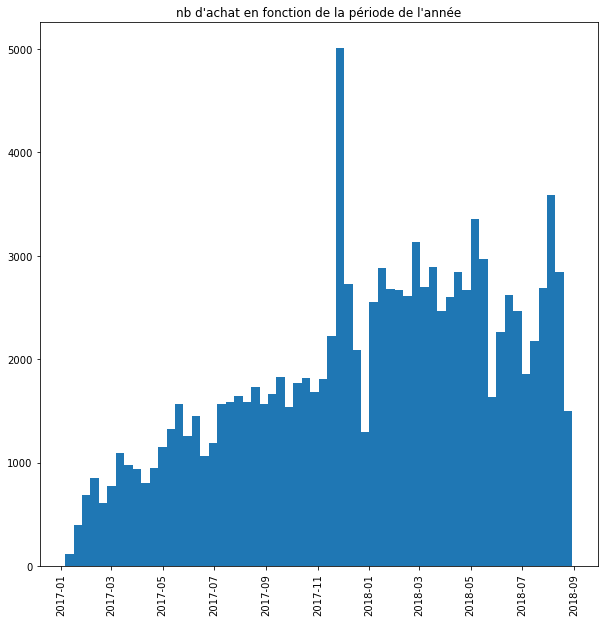

In [48]:
plt.figure(figsize=(10,10))
plt.hist(data3['order_purchase_timestamp'],bins=60)
plt.xticks(rotation=90)
plt.title('nb d\'achat en fonction de la période de l\'année')
plt.show()

In [49]:
date_start = pd.Timestamp('2017-01-01')
date_finish= pd.Timestamp('2018-11-01')

#### Création des colonnes "temps" et "delai_livraison"

In [50]:
data3['temps']=date_finish-data3['order_purchase_timestamp']
data3['delai_livraison']=data3['order_delivered_customer_date']-data3['order_purchase_timestamp']
data3

,customer_id,customer_unique_id,order_id,order_item_id,order_status,order_purchase_timestamp,order_delivered_customer_date,review_score,payment_sequential,payment_installments,payment_value,price,freight_value,temps,delai_livraison
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,1.0,delivered,2017-05-16 15:05:35,2017-05-25 10:35:35,4,1.0,2.0,146.87,124.99,21.88,533 days 08:54:25,8 days 19:30:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,1.0,delivered,2018-01-12 20:48:24,2018-01-29 12:41:19,5,1.0,8.0,335.48,289.00,46.48,292 days 03:11:36,16 days 15:52:55
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,1.0,delivered,2018-05-19 16:07:45,2018-06-14 17:58:51,5,1.0,7.0,157.73,139.94,17.79,165 days 07:52:15,26 days 01:51:06
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,1.0,delivered,2018-03-13 16:06:38,2018-03-28 16:04:25,5,1.0,1.0,173.30,149.94,23.36,232 days 07:53:22,14 days 23:57:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,1.0,delivered,2018-07-29 09:51:30,2018-08-09 20:55:48,5,1.0,8.0,252.25,230.00,22.25,94 days 14:08:30,11 days 11:04:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119146,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,6760e20addcf0121e9d58f2f1ff14298,1.0,delivered,2018-04-07 15:48:17,2018-04-13 20:06:37,4,1.0,6.0,88.78,74.90,13.88,207 days 08:11:43,6 days 04:18:20
119147,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,9ec0c8947d973db4f4e8dcf1fbfa8f1b,1.0,delivered,2018-04-04 08:20:22,2018-04-11 18:54:45,5,1.0,3.0,129.06,114.90,14.16,210 days 15:39:38,7 days 10:34:23
119148,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,fed4434add09a6f332ea398efd656a5c,1.0,delivered,2018-04-08 20:11:50,2018-05-09 19:03:15,1,1.0,5.0,56.04,37.00,19.04,206 days 03:48:10,30 days 22:51:25
119149,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,e31ec91cea1ecf97797787471f98a8c2,1.0,delivered,2017-11-03 21:08:33,2017-11-16 19:58:39,5,1.0,2.0,711.07,689.00,22.07,362 days 02:51:27,12 days 22:50:06


In [51]:
data3['temps']=data3['temps'].dt.days
data3['delai_livraison']=data3['delai_livraison'].dt.days
data3

,customer_id,customer_unique_id,order_id,order_item_id,order_status,order_purchase_timestamp,order_delivered_customer_date,review_score,payment_sequential,payment_installments,payment_value,price,freight_value,temps,delai_livraison
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,1.0,delivered,2017-05-16 15:05:35,2017-05-25 10:35:35,4,1.0,2.0,146.87,124.99,21.88,533,8.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,1.0,delivered,2018-01-12 20:48:24,2018-01-29 12:41:19,5,1.0,8.0,335.48,289.00,46.48,292,16.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,1.0,delivered,2018-05-19 16:07:45,2018-06-14 17:58:51,5,1.0,7.0,157.73,139.94,17.79,165,26.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,1.0,delivered,2018-03-13 16:06:38,2018-03-28 16:04:25,5,1.0,1.0,173.30,149.94,23.36,232,14.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,1.0,delivered,2018-07-29 09:51:30,2018-08-09 20:55:48,5,1.0,8.0,252.25,230.00,22.25,94,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119146,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,6760e20addcf0121e9d58f2f1ff14298,1.0,delivered,2018-04-07 15:48:17,2018-04-13 20:06:37,4,1.0,6.0,88.78,74.90,13.88,207,6.0
119147,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,9ec0c8947d973db4f4e8dcf1fbfa8f1b,1.0,delivered,2018-04-04 08:20:22,2018-04-11 18:54:45,5,1.0,3.0,129.06,114.90,14.16,210,7.0
119148,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,fed4434add09a6f332ea398efd656a5c,1.0,delivered,2018-04-08 20:11:50,2018-05-09 19:03:15,1,1.0,5.0,56.04,37.00,19.04,206,30.0
119149,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,e31ec91cea1ecf97797787471f98a8c2,1.0,delivered,2017-11-03 21:08:33,2017-11-16 19:58:39,5,1.0,2.0,711.07,689.00,22.07,362,12.0


## Export data3

In [52]:
#Export de la data finale (après nettoyage)
data3.to_csv (r'C:\Users\Administrator\export_data3-P5.csv', index = False, header=True)


# Création d'un dataset avec un customer unique

#### D'abord on crée la colonne "frequency" qui correspond au nombre de commandes éffectuées par client durant toute la période d'étude

In [53]:
df = pd.DataFrame(data={'frequency': data3.groupby('customer_unique_id')['order_id'].nunique(dropna=True)})
df

,frequency
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,1
0000b849f77a49e4a4ce2b2a4ca5be3f,1
0000f46a3911fa3c0805444483337064,1
0000f6ccb0745a6a4b88665a16c9f078,1
0004aac84e0df4da2b147fca70cf8255,1
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,1
fffea47cd6d3cc0a88bd621562a9d061,1
ffff371b4d645b6ecea244b27531430a,1


#### On crée ensuite la colonne "total_products_ordered" qui correspond au nombre de procuits achetés par client

In [54]:
df['total_products_ordered'] = data3.groupby(['customer_unique_id','customer_id'])['order_item_id'].max().groupby('customer_unique_id').sum()
df

,frequency,total_products_ordered
customer_unique_id,,
0000366f3b9a7992bf8c76cfdf3221e2,1,1.0
0000b849f77a49e4a4ce2b2a4ca5be3f,1,1.0
0000f46a3911fa3c0805444483337064,1,1.0
0000f6ccb0745a6a4b88665a16c9f078,1,1.0
0004aac84e0df4da2b147fca70cf8255,1,1.0
...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,1,2.0
fffea47cd6d3cc0a88bd621562a9d061,1,1.0
ffff371b4d645b6ecea244b27531430a,1,1.0


#### On crée la colonne "mean review score" 

In [55]:
# mean review score
df['mean_reviews_score'] = data3.groupby('customer_unique_id')['review_score'].mean()
df

,frequency,total_products_ordered,mean_reviews_score
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,1.0,5.0
0000b849f77a49e4a4ce2b2a4ca5be3f,1,1.0,4.0
0000f46a3911fa3c0805444483337064,1,1.0,3.0
0000f6ccb0745a6a4b88665a16c9f078,1,1.0,4.0
0004aac84e0df4da2b147fca70cf8255,1,1.0,5.0
...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,1,2.0,5.0
fffea47cd6d3cc0a88bd621562a9d061,1,1.0,4.0
ffff371b4d645b6ecea244b27531430a,1,1.0,5.0


#### On crée la colonne monetary qui correspond au montant total dépensé par chaque client durant toute la période d'étude


In [56]:
df['monetary'] = data3.groupby(['customer_unique_id','customer_id'])['payment_value'].mean().groupby('customer_unique_id').sum()
df

,frequency,total_products_ordered,mean_reviews_score,monetary
customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,1.0,5.0,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,1,1.0,4.0,27.19
0000f46a3911fa3c0805444483337064,1,1.0,3.0,86.22
0000f6ccb0745a6a4b88665a16c9f078,1,1.0,4.0,43.62
0004aac84e0df4da2b147fca70cf8255,1,1.0,5.0,196.89
...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,1,2.0,5.0,2067.42
fffea47cd6d3cc0a88bd621562a9d061,1,1.0,4.0,84.58
ffff371b4d645b6ecea244b27531430a,1,1.0,5.0,112.46


#### On crée la colonne" montant_moyen" qui correspond au montant moyen dépensé par chaque client durant toute la période d'étude

In [57]:
df['montant_moyen']=data3.groupby('customer_unique_id')['payment_value'].mean()
df


,frequency,total_products_ordered,mean_reviews_score,monetary,montant_moyen
customer_unique_id,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,1.0,5.0,141.90,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,1,1.0,4.0,27.19,27.19
0000f46a3911fa3c0805444483337064,1,1.0,3.0,86.22,86.22
0000f6ccb0745a6a4b88665a16c9f078,1,1.0,4.0,43.62,43.62
0004aac84e0df4da2b147fca70cf8255,1,1.0,5.0,196.89,196.89
...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,1,2.0,5.0,2067.42,2067.42
fffea47cd6d3cc0a88bd621562a9d061,1,1.0,4.0,84.58,84.58
ffff371b4d645b6ecea244b27531430a,1,1.0,5.0,112.46,112.46


### On crée la colonne freight_moyen qui correspond au montant moyen dépensé par chaque client durant toute la période d'étude

In [58]:
df['freight_moyen'] = data3.groupby('customer_unique_id')['freight_value'].mean()
df

,frequency,total_products_ordered,mean_reviews_score,monetary,montant_moyen,freight_moyen
customer_unique_id,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,1.0,5.0,141.90,141.90,12.00
0000b849f77a49e4a4ce2b2a4ca5be3f,1,1.0,4.0,27.19,27.19,8.29
0000f46a3911fa3c0805444483337064,1,1.0,3.0,86.22,86.22,17.22
0000f6ccb0745a6a4b88665a16c9f078,1,1.0,4.0,43.62,43.62,17.63
0004aac84e0df4da2b147fca70cf8255,1,1.0,5.0,196.89,196.89,16.89
...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,1,2.0,5.0,2067.42,2067.42,248.71
fffea47cd6d3cc0a88bd621562a9d061,1,1.0,4.0,84.58,84.58,19.69
ffff371b4d645b6ecea244b27531430a,1,1.0,5.0,112.46,112.46,22.56


#### On crée la colonne "Recency" qui correspond au nombre de jours qui se sont écoulés depuis le dernier achat de chaque client

In [59]:
df['Recency'] = data3.groupby('customer_unique_id')['temps'].min()
df

,frequency,total_products_ordered,mean_reviews_score,monetary,montant_moyen,freight_moyen,Recency
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,1.0,5.0,141.90,141.90,12.00,174
0000b849f77a49e4a4ce2b2a4ca5be3f,1,1.0,4.0,27.19,27.19,8.29,177
0000f46a3911fa3c0805444483337064,1,1.0,3.0,86.22,86.22,17.22,600
0000f6ccb0745a6a4b88665a16c9f078,1,1.0,4.0,43.62,43.62,17.63,384
0004aac84e0df4da2b147fca70cf8255,1,1.0,5.0,196.89,196.89,16.89,351
...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,1,2.0,5.0,2067.42,2067.42,248.71,510
fffea47cd6d3cc0a88bd621562a9d061,1,1.0,4.0,84.58,84.58,19.69,325
ffff371b4d645b6ecea244b27531430a,1,1.0,5.0,112.46,112.46,22.56,631


#### On crée maintenant la colonne "mean_installment" qui correspond au nombre de mois moyen sur les quels se sont étalés les paiments par tranches de chaque client

In [60]:
df['mean_installments'] = data3.groupby(['customer_unique_id','customer_id'])['payment_installments'].mean().groupby('customer_unique_id').mean()
df

,frequency,total_products_ordered,mean_reviews_score,monetary,montant_moyen,freight_moyen,Recency,mean_installments
customer_unique_id,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,1.0,5.0,141.90,141.90,12.00,174,8.0
0000b849f77a49e4a4ce2b2a4ca5be3f,1,1.0,4.0,27.19,27.19,8.29,177,1.0
0000f46a3911fa3c0805444483337064,1,1.0,3.0,86.22,86.22,17.22,600,8.0
0000f6ccb0745a6a4b88665a16c9f078,1,1.0,4.0,43.62,43.62,17.63,384,4.0
0004aac84e0df4da2b147fca70cf8255,1,1.0,5.0,196.89,196.89,16.89,351,6.0
...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,1,2.0,5.0,2067.42,2067.42,248.71,510,10.0
fffea47cd6d3cc0a88bd621562a9d061,1,1.0,4.0,84.58,84.58,19.69,325,1.0
ffff371b4d645b6ecea244b27531430a,1,1.0,5.0,112.46,112.46,22.56,631,1.0


#### on crée enfin la colonne "Delai_livraison_moy" pour chaque client exprimé en nombre de jours 

In [61]:
df['Delai_livraison_moy'] = data3.groupby('customer_unique_id')['delai_livraison'].mean()
df

,frequency,total_products_ordered,mean_reviews_score,monetary,montant_moyen,freight_moyen,Recency,mean_installments,Delai_livraison_moy
customer_unique_id,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,1.0,5.0,141.90,141.90,12.00,174,8.0,6.0
0000b849f77a49e4a4ce2b2a4ca5be3f,1,1.0,4.0,27.19,27.19,8.29,177,1.0,3.0
0000f46a3911fa3c0805444483337064,1,1.0,3.0,86.22,86.22,17.22,600,8.0,25.0
0000f6ccb0745a6a4b88665a16c9f078,1,1.0,4.0,43.62,43.62,17.63,384,4.0,20.0
0004aac84e0df4da2b147fca70cf8255,1,1.0,5.0,196.89,196.89,16.89,351,6.0,13.0
...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,1,2.0,5.0,2067.42,2067.42,248.71,510,10.0,27.0
fffea47cd6d3cc0a88bd621562a9d061,1,1.0,4.0,84.58,84.58,19.69,325,1.0,30.0
ffff371b4d645b6ecea244b27531430a,1,1.0,5.0,112.46,112.46,22.56,631,1.0,14.0


In [62]:
Sortedorders=df.sort_values(by = 'monetary', ascending = False)
Sortedorders.head()

,frequency,total_products_ordered,mean_reviews_score,monetary,montant_moyen,freight_moyen,Recency,mean_installments,Delai_livraison_moy
customer_unique_id,,,,,,,,,
0a0a92112bd4c708ca5fde585afaa872,1,8.0,1.0,13664.08,13664.080,28.010,397,1.0,18.0
da122df9eeddfedc1dc1f5349a1a690c,2,2.0,5.0,7571.63,3785.815,91.815,578,10.0,15.0
763c8b1c9c68a0229c42c9fc6f662b93,1,4.0,1.0,7274.88,7274.880,28.720,108,1.0,11.0
dc4802a71eae9be1dd28f5d788ceb526,1,1.0,5.0,6929.31,6929.310,194.310,626,8.0,18.0
459bef486812aa25204be022145caa62,1,1.0,1.0,6922.21,6922.210,193.210,98,1.0,20.0


#### On supprime la ligne avec monetary = 13664.08	car c'est une valeur aberrante

In [63]:
OUTL=df[(df['monetary']>8000)].index
df.drop(OUTL, inplace=True)
df.shape

(93103, 9)

#### a présent, il ne faut pas qu'il y est des zéros ou des NaN dans notre tableau, on traite donc ça

In [64]:
df['mean_installments']= df['mean_installments'].replace([0],1)
df['freight_moyen']= df['freight_moyen'].replace([0],1)
df['Delai_livraison_moy']= df['Delai_livraison_moy'].replace([0],1)
df['Delai_livraison_moy'].fillna((df['Delai_livraison_moy'].mean()), inplace=True)

# Tableau final

In [65]:
df

,frequency,total_products_ordered,mean_reviews_score,monetary,montant_moyen,freight_moyen,Recency,mean_installments,Delai_livraison_moy
customer_unique_id,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,1.0,5.0,141.90,141.90,12.00,174,8.0,6.0
0000b849f77a49e4a4ce2b2a4ca5be3f,1,1.0,4.0,27.19,27.19,8.29,177,1.0,3.0
0000f46a3911fa3c0805444483337064,1,1.0,3.0,86.22,86.22,17.22,600,8.0,25.0
0000f6ccb0745a6a4b88665a16c9f078,1,1.0,4.0,43.62,43.62,17.63,384,4.0,20.0
0004aac84e0df4da2b147fca70cf8255,1,1.0,5.0,196.89,196.89,16.89,351,6.0,13.0
...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,1,2.0,5.0,2067.42,2067.42,248.71,510,10.0,27.0
fffea47cd6d3cc0a88bd621562a9d061,1,1.0,4.0,84.58,84.58,19.69,325,1.0,30.0
ffff371b4d645b6ecea244b27531430a,1,1.0,5.0,112.46,112.46,22.56,631,1.0,14.0


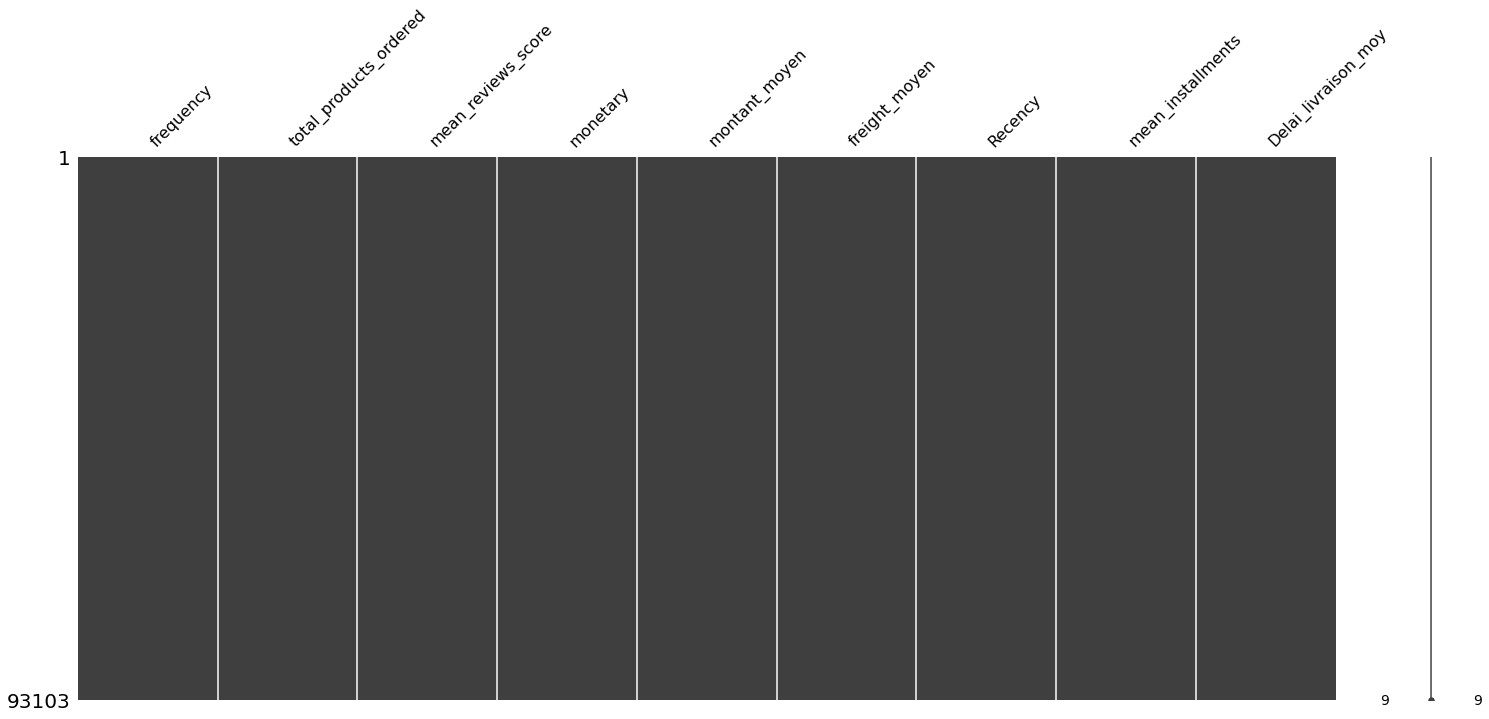

In [66]:
msno.matrix(df);

## #Export du tableau pret pour la segmentation

In [67]:
#Export de la data finale (après nettoyage)
df.to_csv (r'C:\Users\Administrator\export_df-P5.csv', index = False, header=True)


# Etude exploratoire

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93103 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   frequency               93103 non-null  int64  
 1   total_products_ordered  93103 non-null  float64
 2   mean_reviews_score      93103 non-null  float64
 3   monetary                93103 non-null  float64
 4   montant_moyen           93103 non-null  float64
 5   freight_moyen           93103 non-null  float64
 6   Recency                 93103 non-null  int64  
 7   mean_installments       93103 non-null  float64
 8   Delai_livraison_moy     93103 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 7.1+ MB


## frequency

In [69]:
pd.DataFrame(df.groupby(['frequency'])['frequency'].count())

,frequency
frequency,
1,90314
2,2562
3,180
4,28
5,9
6,5
7,3
9,1
15,1


Text(0.5, 1.0, 'Répartition de frequency')

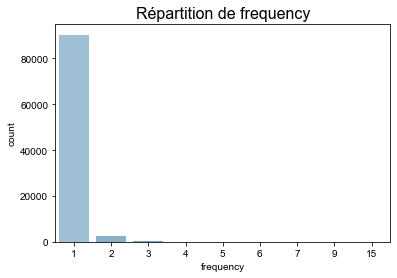

In [70]:
ax=sns.countplot(x="frequency",data=df, palette="Blues_d")
sns.set(rc={'figure.figsize':(10,8)})
plt.title("Répartition de frequency", fontsize=16, color='black')

## total_products_ordered

In [71]:
pd.DataFrame(df.groupby(['total_products_ordered'])['total_products_ordered'].count())

,total_products_ordered
total_products_ordered,
1.0,81532
2.0,8772
3.0,1640
4.0,617
5.0,240
6.0,188
7.0,45
8.0,15
9.0,10


Text(0.5, 1.0, 'Répartition de total_products_ordered')

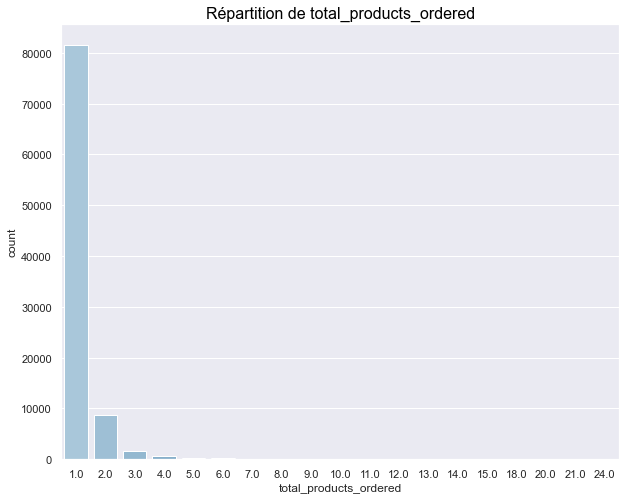

In [72]:
ax=sns.countplot(x="total_products_ordered",data=df, palette="Blues_d")
sns.set(rc={'figure.figsize':(10,8)})
plt.title("Répartition de total_products_ordered", fontsize=16, color='black')

## mean_reviews_score

Text(0.5, 1.0, 'Répartition du mean_reviews_score')

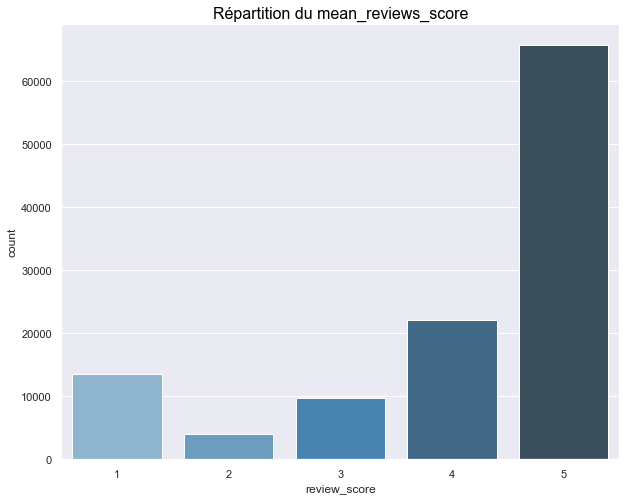

In [73]:
ax=sns.countplot(x="review_score",data=data3, palette="Blues_d")
sns.set(rc={'figure.figsize':(10,8)})
plt.title("Répartition du mean_reviews_score", fontsize=16, color='black')

## freight_moyen

In [74]:
Sortedfreight=df.sort_values(by = 'freight_moyen', ascending = False)
freightSorted=Sortedfreight[['freight_moyen']]


Text(0.5, 1.0, 'Distribution de freight_moyen')

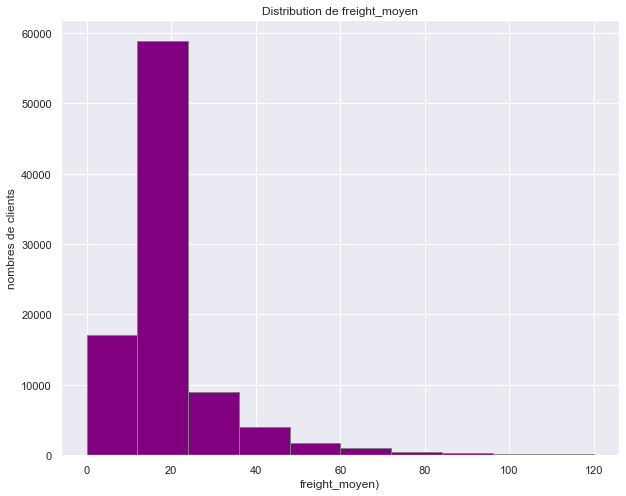

In [75]:
plt.hist(freightSorted, range = (0, 120), bins = 10, color = 'purple',
            edgecolor = 'grey')
plt.xlabel('freight_moyen)')
plt.ylabel('nombres de clients')
plt.title("Distribution de freight_moyen")

## monetary

In [76]:
DataSortedmonetary=df.sort_values(by = 'monetary', ascending = False)
monetarySorted=DataSortedmonetary[['monetary']]

Text(0.5, 1.0, 'Distribution de monetary')

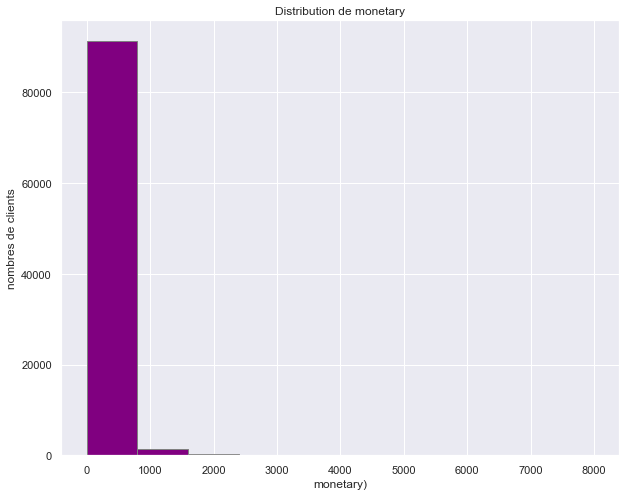

In [77]:
plt.hist(monetarySorted, range = (0, 8000), bins = 10, color = 'purple',
            edgecolor = 'grey')
plt.xlabel('monetary)')
plt.ylabel('nombres de clients')
plt.title("Distribution de monetary")

Text(0, 0.5, 'monetary')

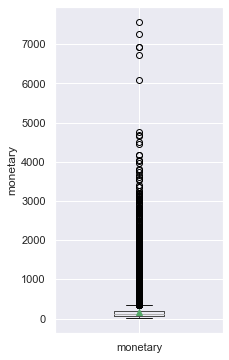

In [78]:
boxplot = df.boxplot( column=['monetary'], fontsize=11, figsize= (3,6), widths=(0.3),showmeans=True )
plt.ylabel('monetary')

## montant moyen

In [79]:
DataSortedmonetary=df.sort_values(by = 'montant_moyen', ascending = False)
monetarySorted=DataSortedmonetary[['montant_moyen']]

Text(0.5, 1.0, 'Distribution du montant_moyen')

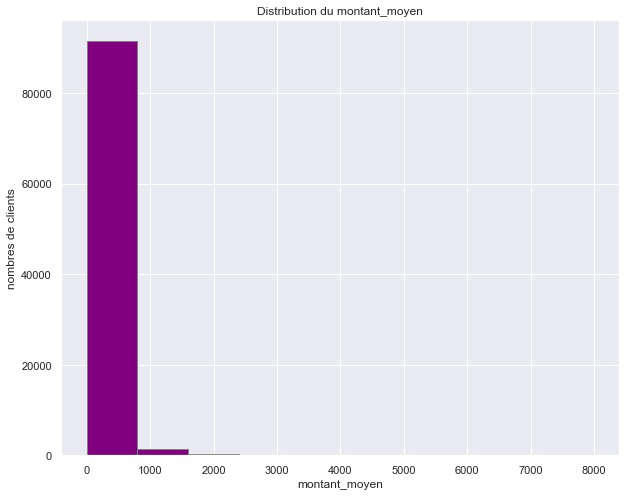

In [80]:
plt.hist(monetarySorted, range = (0, 8000), bins = 10, color = 'purple',
            edgecolor = 'grey')
plt.xlabel('montant_moyen')
plt.ylabel('nombres de clients')
plt.title("Distribution du montant_moyen")

Text(0, 0.5, 'montant_moyen')

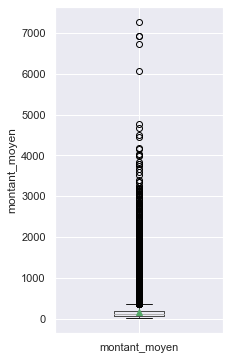

In [81]:
boxplot = df.boxplot( column=['montant_moyen'], fontsize=11, figsize= (3,6), widths=(0.3),showmeans=True )
plt.ylabel('montant_moyen')

## Recency

In [82]:
DataSortedRecency=df.sort_values(by = 'Recency', ascending = False)
RecencySorted=DataSortedRecency[['Recency']]

Text(0.5, 1.0, 'Distribution de Recency')

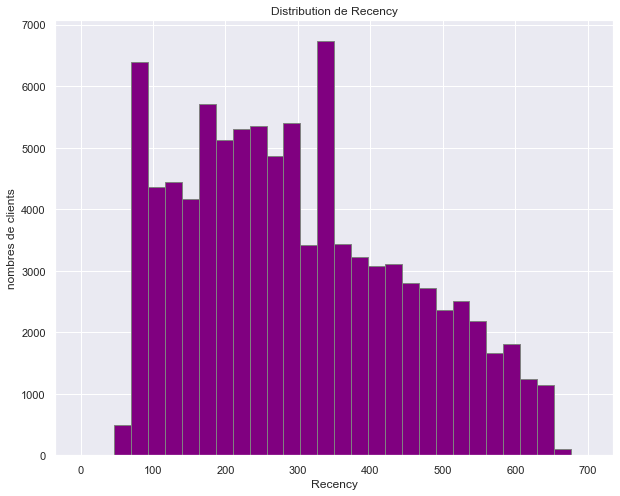

In [83]:
plt.hist(RecencySorted, range = (0, 700), bins = 30, color = 'purple',
            edgecolor = 'grey')
plt.xlabel('Recency')
plt.ylabel('nombres de clients')
plt.title("Distribution de Recency")

## mean_installments

In [84]:
pd.DataFrame(data3.groupby(['payment_installments'])['payment_installments'].count())

,payment_installments
payment_installments,
0.0,3
1.0,57373
2.0,13424
3.0,11472
4.0,7802
5.0,5890
6.0,4509
7.0,1765
8.0,4938


Text(0.5, 1.0, 'Répartition du payment_installments')

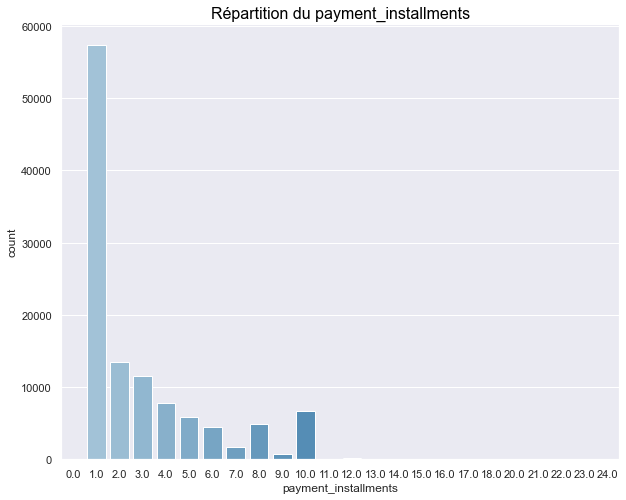

In [85]:
ax=sns.countplot(x="payment_installments",data=data3, palette="Blues_d")
sns.set(rc={'figure.figsize':(10,8)})
plt.title("Répartition du payment_installments", fontsize=16, color='black')

## Delai_livraison_moy

In [86]:
DataSorteddelai=df.sort_values(by = 'Delai_livraison_moy', ascending = False)
delaiSorted=DataSorteddelai[['Delai_livraison_moy']]

Text(0.5, 1.0, 'Distribution de RDelai_livraison_moy')

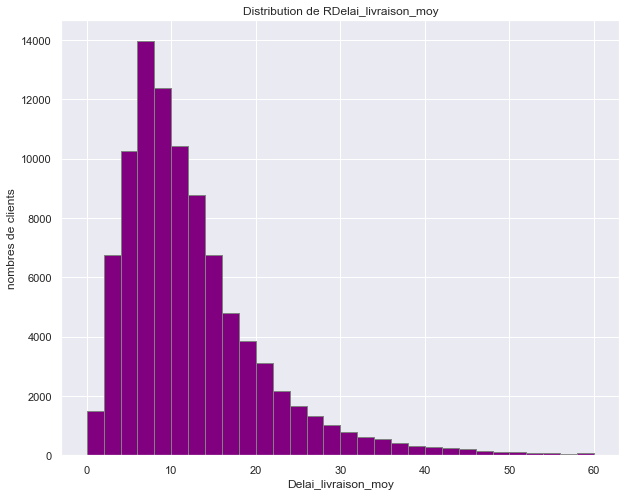

In [87]:
plt.hist(delaiSorted, range = (0, 60), bins = 30, color = 'purple',
            edgecolor = 'grey')
plt.xlabel('Delai_livraison_moy')
plt.ylabel('nombres de clients')
plt.title("Distribution de RDelai_livraison_moy")

<AxesSubplot:>

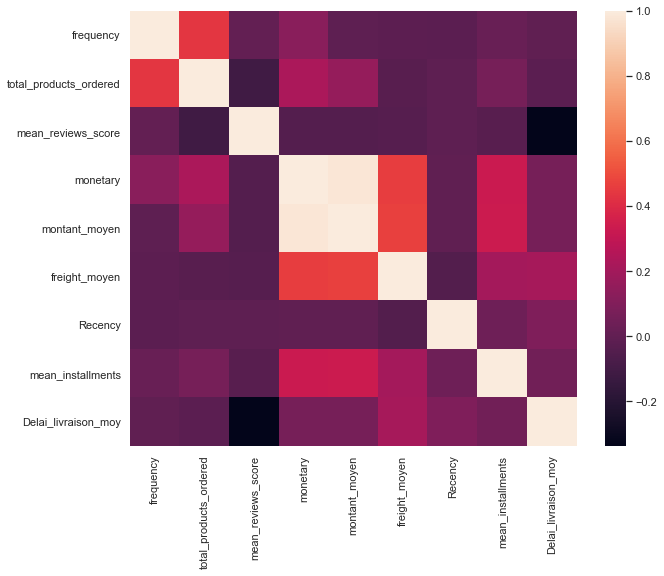

In [88]:
sns.heatmap(df.corr())